<a href="https://colab.research.google.com/github/KJ-black/Machine-Learning-on-Material-Informatics/blob/main/HW6_clustering/louvain_modularity_clustering_by_Euclidean_distance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load Dataset

## Load Data Points

In [ ]:
import numpy as np
import pandas as pd
import scipy.io

XYZ_Coord = scipy.io.loadmat('data/XYZcoord1.mat')
XYZ_C = np.array(XYZ_Coord ['XYZ1'])
print(XYZ_C)
print(XYZ_C.shape)

[[ 0.6851533   1.17897583  3.52402492]
 [ 1.00216962  1.21572705 29.32701994]
 [ 1.15125728  3.32476951 23.614195  ]
 ...
 [90.13576705 15.58773776 34.16825421]
 [90.73121678 16.76765189 13.4218382 ]
 [89.09981586 18.50040944 13.39066304]]
(2000, 3)


### Visualize Data Points

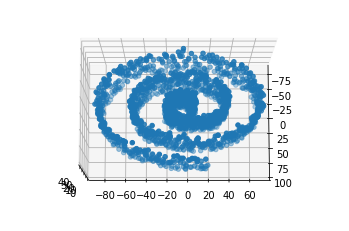

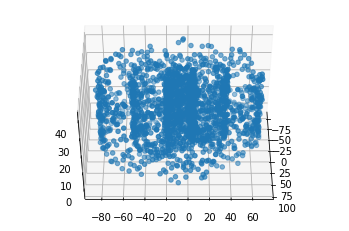

In [ ]:
import matplotlib.pyplot as plt
fig1 = plt.figure()
ax = plt.axes(projection='3d')
z = XYZ_C[:,2]
x = XYZ_C[:,0]
y = XYZ_C[:,1]
ax.scatter(x, y, z, cmap = plt.get_cmap('jet'))
ax.view_init(80, 0)

fig2 = plt.figure()
ax = plt.axes(projection='3d')
z = XYZ_C[:,2]
x = XYZ_C[:,0]
y = XYZ_C[:,1]
ax.scatter(x, y, z, cmap = plt.get_cmap('jet'))
ax.view_init(45, 0)

## Edges by Euclidean distance

In [ ]:
import math

def dist(a,b):
    r = (a[0]-b[0])**2+(a[1]-b[1])**2+(a[2]-b[2])**2
    # r = math.sqrt(r)
    return r

try:
    XYZ_Edges = np.load("data/Euclidean_Edge.npy")
except:
    import tqdm
    XYZ_Edges = np.empty(shape=[0, 3])
    Euclidean_calTemp = np.empty(shape=[0, 3])

    for i in tqdm.tqdm(range(len(XYZ_C))):
        for j in range(i+1, len(XYZ_C)):
            pair = [ i+1, j+1, dist(XYZ_C[i], XYZ_C[j]) ]
            Euclidean_calTemp = np.vstack(( Euclidean_calTemp, pair))
        
        if i % 20 == 0 or i == len(XYZ_C)-1:
            XYZ_Edges = np.vstack((XYZ_Edges, Euclidean_calTemp))
            Euclidean_calTemp = np.empty(shape=[0, 3])

    print(XYZ_Edges)
    np.save("Euclidean_Edge", XYZ_Edges)

100%|██████████| 2000/2000 [01:47<00:00, 18.55it/s] 

[[1.00000000e+00 2.00000000e+00 6.65896402e+02]
 [1.00000000e+00 3.00000000e+00 4.08436617e+02]
 [1.00000000e+00 4.00000000e+00 1.23927653e+02]
 ...
 [1.99800000e+03 1.99900000e+03 4.32160535e+02]
 [1.99800000e+03 2.00000000e+03 4.41265146e+02]
 [1.99900000e+03 2.00000000e+03 5.66488956e+00]]


# Construct the Network using networkx

Use the following command to install required package.
<br>`pip install python-louvain networkx`
- [Community detection for NetworkX’s documentation](https://python-louvain.readthedocs.io/en/latest/index.html)
- [Software for Complex Networks](https://networkx.github.io/documentation/stable/index.html)

In [ ]:
from community import community_louvain
import networkx as nx

# Use pre-defined linkage (Edges.csv) to constructure whole network
G = nx.Graph() # Construct no direct graph
for i in range(0, len(XYZ_Edges)):    
    e = ( str(int(XYZ_Edges[i,0])), str(int(XYZ_Edges[i,1])), XYZ_Edges[i,2] ) # e = ( node1, node2, weight )
    G.add_weighted_edges_from([(e)])    

## Visaulize the Original Grpah

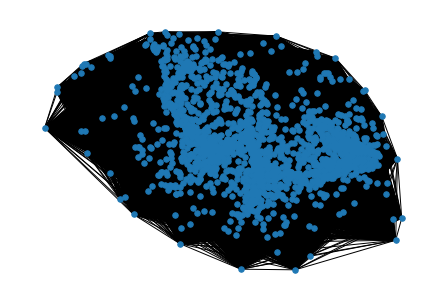

In [ ]:
nx.draw(G, node_size=30)

## Partition the Graph

In [ ]:
partition = community_louvain.best_partition(G)
print(partition)
size = float(len(set(partition.values())))
print("community:", size) # number of groups that was partitioned
mod = community_louvain.modularity(partition,G)
print("modularity:", mod)

{'1': 0, '2': 1, '3': 1, '4': 81, '5': 21, '6': 87, '7': 5, '8': 21, '9': 62, '10': 55, '11': 8, '12': 9, '13': 58, '14': 15, '15': 57, '16': 13, '17': 14, '18': 66, '19': 16, '20': 17, '21': 18, '22': 74, '23': 20, '24': 29, '25': 38, '26': 23, '27': 93, '28': 69, '29': 26, '30': 60, '31': 8, '32': 92, '33': 30, '34': 24, '35': 26, '36': 32, '37': 89, '38': 47, '39': 93, '40': 3, '41': 33, '42': 41, '43': 67, '44': 56, '45': 60, '46': 51, '47': 21, '48': 56, '49': 57, '50': 44, '51': 7, '52': 97, '53': 46, '54': 80, '55': 13, '56': 83, '57': 19, '58': 16, '59': 53, '60': 90, '61': 50, '62': 72, '63': 57, '64': 99, '65': 49, '66': 83, '67': 21, '68': 2, '69': 63, '70': 64, '71': 71, '72': 0, '73': 67, '74': 24, '75': 72, '76': 70, '77': 44, '78': 79, '79': 30, '80': 38, '81': 75, '82': 3, '83': 0, '84': 77, '85': 39, '86': 79, '87': 52, '88': 81, '89': 13, '90': 89, '91': 75, '92': 75, '93': 95, '94': 2, '95': 72, '96': 51, '97': 97, '98': 52, '99': 86, '100': 87, '101': 88, '102': 15,

### See each community's members

In [ ]:
for com in set(partition.values()) :
    print("Community", com)
    members = list_nodes = [nodes for nodes in partition.keys() if partition[nodes] == com]
    print(members)

Community 0
['1', '72', '83', '224', '323', '449', '457', '599', '751', '779', '872', '1007', '1108', '1110', '1153', '1209', '1339', '1354', '1375', '1398', '1508', '1686', '1694', '1745', '1748', '1983']
Community 1
['2', '3', '111', '121', '161', '195', '223', '353', '398', '732', '778', '798', '825', '1086', '1370', '1604', '1626', '1747', '1849', '1869', '1955', '1956']
Community 2
['68', '94', '154', '202', '229', '258', '261', '271', '847', '860', '893', '914', '931', '983', '991', '1067', '1170', '1174', '1395', '1441', '1566', '1814', '1894', '1947', '1952', '1976']
Community 3
['40', '82', '540', '804', '916', '1134', '1237', '1262', '1551', '1620', '1875']
Community 4
['156', '167', '200', '232', '269', '401', '517', '541', '562', '676', '680', '1023', '1346', '1360', '1470', '1594', '1673', '1717', '1758', '1858', '1965']
Community 5
['7', '298', '826', '879', '899', '925', '1168', '1232', '1358', '1727', '1944']
Community 6
['160', '377', '536', '700', '806', '1070', '1131

### Assign node color based on community in network


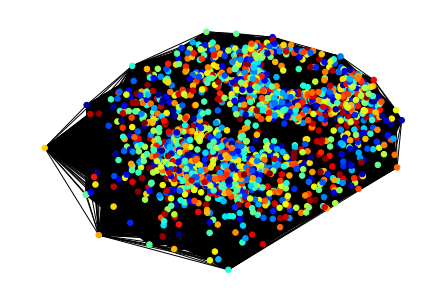

In [ ]:
values = [partition.get(node) for node in G.nodes()]
nx.draw_spring(G, cmap = plt.get_cmap('jet'), node_color = values, node_size = 30, with_labels = False)
plt.show()    

### Assign data point color based on community in realspace

In [ ]:
label = np.zeros((len(XYZ_C),1))

# get the nodes' label based on the nodes' order
for j in set(partition.values()) :
    for i in range(len(XYZ_C)) :
        if partition[str(i+1)] == j:           
            label[i] = j
labelRE = np.reshape(label, len(XYZ_C))  
print(labelRE)          

[ 0.  1.  1. ... 63. 30. 40.]


## Plot Result

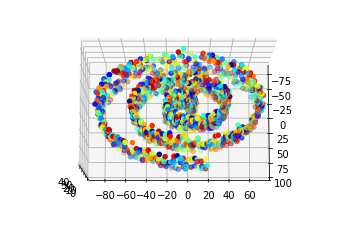

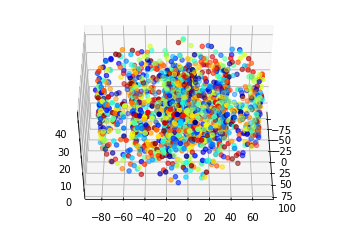

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig1 = plt.figure()
ax = plt.axes(projection='3d')
z = XYZ_C[:,2]
x = XYZ_C[:,0]
y = XYZ_C[:,1]
c = labelRE
ax.scatter(x, y, z, c = c, cmap = plt.get_cmap('jet'))
ax.view_init(80, 0)

fig2 = plt.figure()
ax = plt.axes(projection='3d')
z = XYZ_C[:,2]
x = XYZ_C[:,0]
y = XYZ_C[:,1]
c = labelRE
ax.scatter(x, y, z, c = c, cmap = plt.get_cmap('jet'))
ax.view_init(45, 0)